# Load Prediction

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('./dataset/train.csv')
test_data = pd.read_csv('./dataset/test.csv')

In [3]:
train_data.shape

(614, 13)

In [4]:
test_data.shape

(367, 12)

#### Creating a backup file

In [5]:
train_data_og = train_data.copy()
test_data_og = test_data.copy()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV

In [11]:
train_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
test_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [13]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
train_data.shape, test_data.shape

((614, 13), (367, 12))

In [16]:
train_data.Loan_Status.value_counts(normalize=True) # normalize help in normalizing the values

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

There isnt a good bal between our target which needs to be managed using ROS method or stratify

#### Visualising Categorical variables

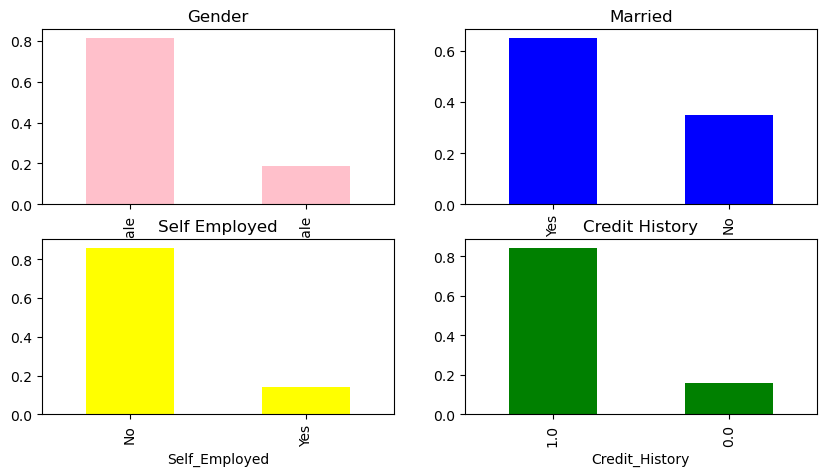

In [22]:
plt.figure(1)
plt.subplot(2,2,1)
train_data.Gender.value_counts(normalize=True).plot.bar(figsize=(10, 5), title="Gender", color="pink")
plt.subplot(2,2,2)
train_data.Married.value_counts(normalize=True).plot.bar(figsize=(10, 5), title="Married", color="blue")
plt.subplot(2,2,3)
train_data.Self_Employed.value_counts(normalize=True).plot.bar(figsize=(10, 5), title="Self Employed", color="yellow")
plt.subplot(2,2,4)
train_data.Credit_History.value_counts(normalize=True).plot.bar(figsize=(10, 5), title="Credit History", color="green")

plt.show()

Most loan Applicants are male, married and not self_employed with a 1.0 credit history

#### Visualising Ordinal variables

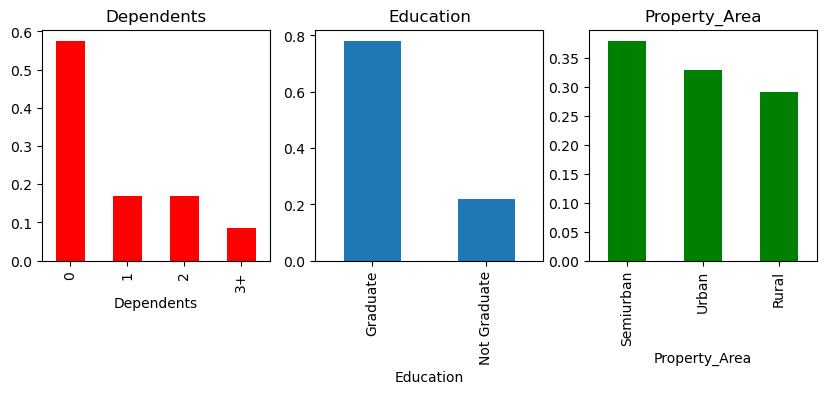

In [23]:
plt.figure(1)
plt.subplot(1,3,1)
train_data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Dependents',color='red')
plt.subplot(1,3,2)
train_data['Education'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Education')
plt.subplot(1,3,3)
train_data['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(10,3),title='Property_Area',color='green')
plt.show()

Most applicants dont have dependents are graduates and belong from semiurban area

In [24]:
train_data['Dependents'] = train_data['Dependents'].replace('3+', '3')

#### Visualising Numeric Variables and checking for outliers

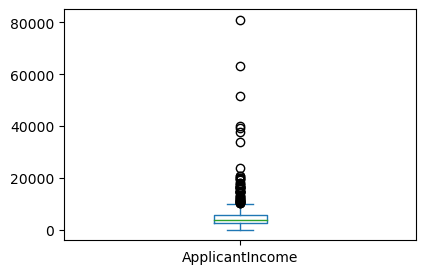

In [28]:
plt.figure(1)
plt.subplot(1,2,1)
# sns.distplot(train_data.ApplicantIncome)
# plt.subplot(1,2,2)
train_data.ApplicantIncome.plot.box(figsize=(10, 3))
plt.show()

We can observe that there is high left skewness in the applicant income which means there are outliers which needs to be treated before we build our model

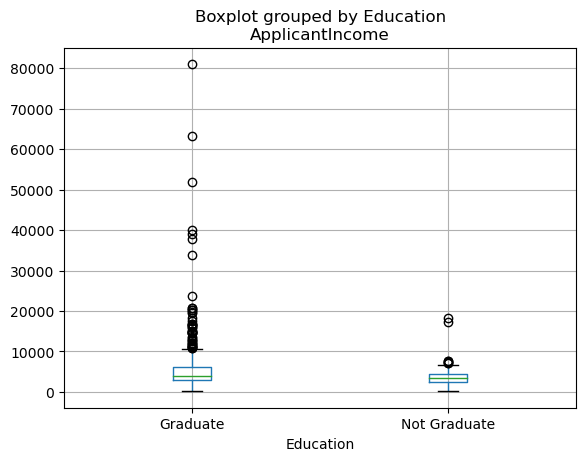

In [30]:
#Visualizing the application income considering whether applicant is graduate or not

train_data.boxplot(column="ApplicantIncome", by="Education")
plt.show()

We can observe that most anomalies are in case of Graduates compared to non graduates

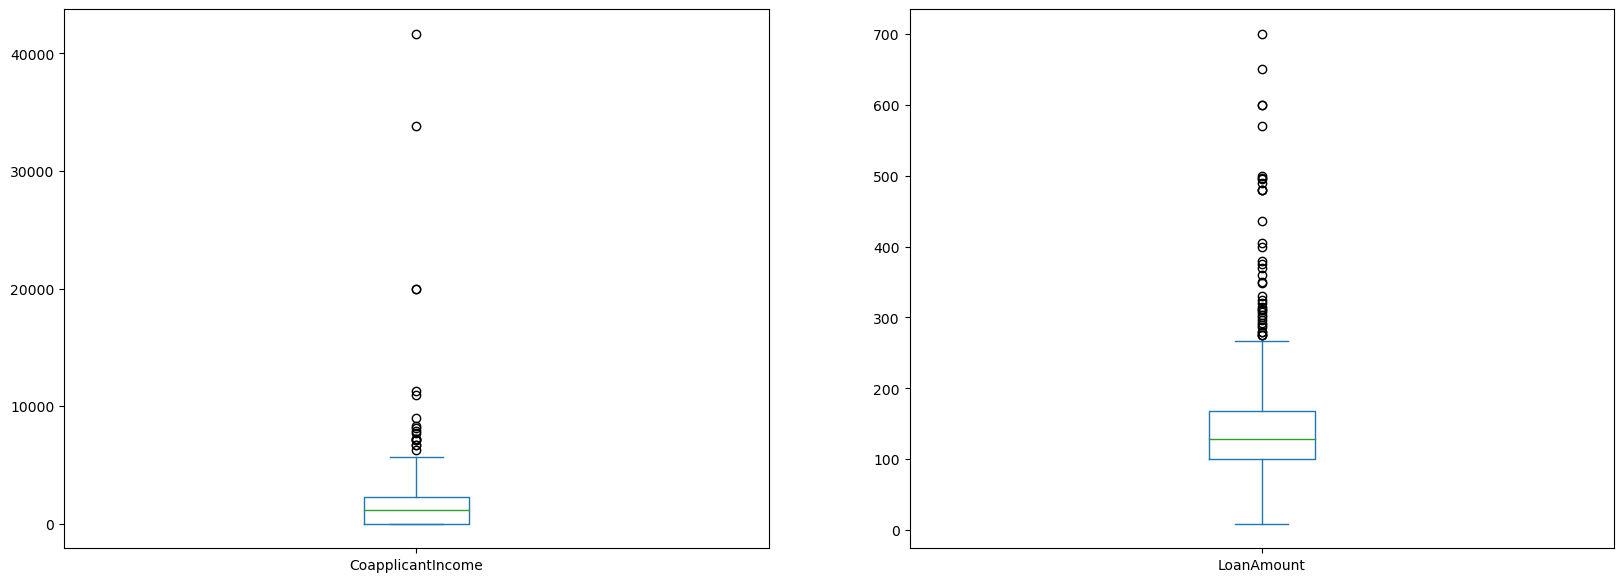

In [34]:
plt.figure(1)
plt.subplot(1,2,1)
train_data['CoapplicantIncome'].plot.box(figsize=(20,7))
plt.subplot(1,2,2)
train_data['LoanAmount'].plot.box()
plt.show()

#### Bivariate Analysis